In [44]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [45]:
m = np.linspace(1,7,7)

r_d= np.array([
1.79,
2.48,
3.09,
3.50,
3.93,
4.28,
4.62])

r_l= np.array([
1.27,
2.08,
2.80,
3.28,
3.71,
4.10,
4.46])

r_d *= 0.5*0.1
r_l *= 0.5*0.1

eps_d = np.array([
5.6,
4.0,
3.2,
2.9,
2.5,
2.3,
2.2])

eps_l = np.array([
7.9,
4.8,
3.6,
3.0,
2.7,
2.4,
2.2])

rd = np.ones(8)*0.8 * 0.5 * 0.1

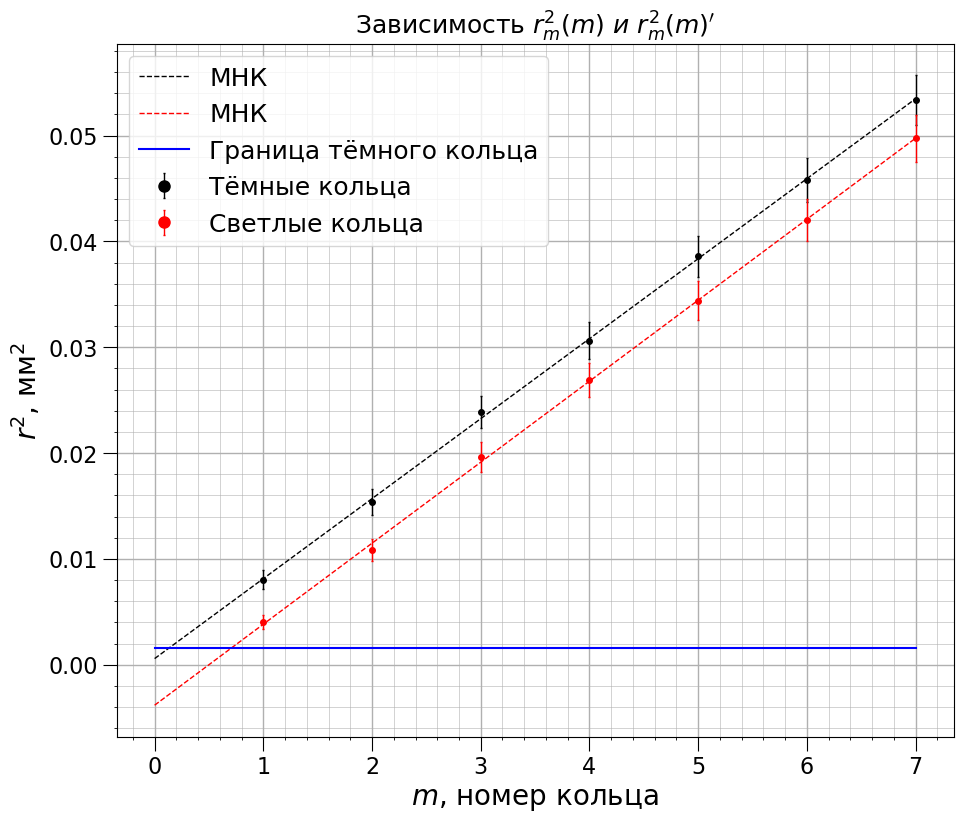

In [54]:
plot_1 = plt.figure(figsize=(12*0.9,10*0.9))

plt.title("Зависимость $r_m^2(m)\ и\  r_m^2(m)'$", fontsize=18)
#plt.xlim(xmin=0, xmax=6)
#plt.ylim(ymin=0, ymax=19)
plt.xlabel('$m$, номер кольца',
           fontsize=20,
           rotation=0,
           #ha='right'
          )
plt.ylabel('$r^2$, мм$^2$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.minorticks_on()
plt.grid(visible=True, linewidth=1)
plt.grid(which='minor', visible=True, linewidth=0.4)



yerr_1 = eps_d*2/100 * r_d**2
yerr_2 = eps_l*2/100 * r_l**2
#xerr_1 = 0.01

#z, err = np.polyfit(D, Q[1], deg=1, cov=True)
#polynom_2 = np.poly1d(z)
#plt.plot(D, polynom_2(D),"b--", linewidth=1, label="МНК")

plt.errorbar(
    m,
    r_d**2,
    fmt='ko',
    linewidth=1,
    markersize=4,
    elinewidth=1,
    label='Тёмные кольца',
    #xerr=xerr_1,
    yerr=yerr_1,
    capsize=1
)

plt.errorbar(
    m,
    r_l**2,
    fmt='ro',
    linewidth=1,
    markersize=4,
    elinewidth=1,
    label='Светлые кольца',
    #xerr=xerr_1,
    yerr=yerr_2,
    capsize=1
)

z = np.polyfit(m, r_d**2, deg=1)
polynom_1 = np.poly1d(z)
plt.plot(np.linspace(0,7,8), polynom_1(np.linspace(0,7,8)),"k--", linewidth=1, label="МНК")

z = np.polyfit(m, r_l**2, deg=1)
polynom_2 = np.poly1d(z)
plt.plot(np.linspace(0,7,8), polynom_2(np.linspace(0,7,8)),"r--", linewidth=1, label="МНК")

plt.plot(np.linspace(0,7,8), rd**2, 'b-', label="Граница тёмного кольца")
plt.grid(True)

plt.legend(fontsize=18, markerscale = 2)
plt.show()

plot_1.savefig(
    'r2(m).pdf',
    format='pdf',
    bbox_inches='tight',
    #pad_inches=4
)

In [32]:
#Mean squared error
x = m
y = r_d**2
n = len(m)
k = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x * x) - np.mean(x) ** 2)
b = np.mean(y) - k * np.mean(x)
k_o = np.mean(x*y) / np.mean(x ** 2)
error_k = 1 / np.sqrt(n) * np.sqrt(((np.mean(y * y)) - np.mean(y) ** 2) / (np.mean(x * x) - np.mean(x) ** 2) - k**2)
k_o, error_k, b, error_k/k_o

(0.007673123214285716,
 5.647039579147293e-05,
 0.0005737857142856725,
 0.007359505929259303)